In [1]:
import pandas as pd
import sys
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas.tools.plotting import radviz
import scipy as sp                  # Importamos scipy como el alias sp

%matplotlib inline

import seaborn as sns
sns.set()

# https://seaborn.pydata.org/examples/heatmap_annotation.html
# https://www.kaggle.com/arkenan/an-lisis-exploratorio-relaci-n-entre-variables

In [3]:
viajes = pd.read_csv("data/trip.csv", 
                     parse_dates=["start_date", "end_date"], infer_datetime_format=True,
                     dtype={"subscription_type":"category"})

In [4]:
print viajes.dtypes
viajes


id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type           category
zip_code                      object
dtype: object


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060


In [5]:
viajes.duration.sort_values().head(5)


301480    60
252114    60
79739     60
618094    60
547555    60
Name: duration, dtype: int64

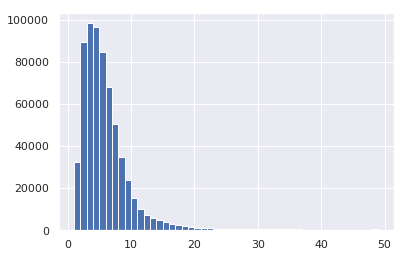

In [7]:
viajes.duration.apply(lambda d: d/100).hist(bins=range(1,50));
plt.show()



In [10]:
# Agrego el week_day
dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
viajes["week_day"] = pd.Categorical(viajes.start_date.dt.weekday_name, categories=dias_ordenados)
print(viajes.dtypes)

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type           category
zip_code                      object
week_day                    category
dtype: object


In [9]:
viajes

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,week_day
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,Thursday
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,Thursday
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,Thursday
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,Thursday
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,Thursday
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109,Thursday
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,Thursday
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112,Thursday
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,Thursday
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,Thursday


In [11]:
# Cantidad de días distintos
fechasDistintas = pd.DataFrame({"fecha": viajes.start_date.dt.date, "week_day": viajes.week_day})
cantDias = fechasDistintas.groupby(["week_day","fecha"]).agg(lambda x:1).reset_index().week_day.value_counts()
# Arreglo del índice categórico.
cantDias.index = pd.Categorical(cantDias.index, categories=dias_ordenados)
cantDias = cantDias.sort_index()
cantDias

Monday       105
Tuesday      104
Wednesday    104
Thursday     105
Friday       105
Saturday     105
Sunday       105
Name: week_day, dtype: int64

In [13]:
fechasDistintas = pd.DataFrame({"fecha": viajes.start_date.dt.date, "week_day": viajes.week_day})
fechasDistintas

,fecha,week_day
0,2013-08-29,Thursday
1,2013-08-29,Thursday
2,2013-08-29,Thursday
3,2013-08-29,Thursday
4,2013-08-29,Thursday
5,2013-08-29,Thursday
6,2013-08-29,Thursday
7,2013-08-29,Thursday
8,2013-08-29,Thursday
9,2013-08-29,Thursday


In [17]:
cantDias = fechasDistintas.groupby(["week_day","fecha"]).agg(lambda x:1)
cantDias

week_day  fecha     
Monday    2013-09-02    1
          2013-09-09    1
          2013-09-16    1
          2013-09-23    1
          2013-09-30    1
          2013-10-07    1
          2013-10-14    1
          2013-10-21    1
          2013-10-28    1
          2013-11-04    1
          2013-11-11    1
          2013-11-18    1
          2013-11-25    1
          2013-12-02    1
          2013-12-09    1
          2013-12-16    1
          2013-12-23    1
          2013-12-30    1
          2014-01-06    1
          2014-01-13    1
          2014-01-20    1
          2014-01-27    1
          2014-02-03    1
          2014-02-10    1
          2014-02-17    1
          2014-02-24    1
          2014-03-03    1
          2014-03-10    1
          2014-03-17    1
          2014-03-24    1
                       ..
Sunday    2015-02-08    1
          2015-02-15    1
          2015-02-22    1
          2015-03-01    1
          2015-03-08    1
          2015-03-15    1
          2015-03

In [19]:
cantDias = fechasDistintas.groupby(["week_day","fecha"]).agg(lambda x:1).reset_index()
cantDias

,week_day,fecha,0
0,Monday,2013-09-02,1
1,Monday,2013-09-09,1
2,Monday,2013-09-16,1
3,Monday,2013-09-23,1
4,Monday,2013-09-30,1
5,Monday,2013-10-07,1
6,Monday,2013-10-14,1
7,Monday,2013-10-21,1
8,Monday,2013-10-28,1
9,Monday,2013-11-04,1


In [20]:
cantDias = fechasDistintas.groupby(["week_day","fecha"]).agg(lambda x:1).reset_index().week_day
cantDias

0      Monday
1      Monday
2      Monday
3      Monday
4      Monday
5      Monday
6      Monday
7      Monday
8      Monday
9      Monday
10     Monday
11     Monday
12     Monday
13     Monday
14     Monday
15     Monday
16     Monday
17     Monday
18     Monday
19     Monday
20     Monday
21     Monday
22     Monday
23     Monday
24     Monday
25     Monday
26     Monday
27     Monday
28     Monday
29     Monday
        ...  
703    Sunday
704    Sunday
705    Sunday
706    Sunday
707    Sunday
708    Sunday
709    Sunday
710    Sunday
711    Sunday
712    Sunday
713    Sunday
714    Sunday
715    Sunday
716    Sunday
717    Sunday
718    Sunday
719    Sunday
720    Sunday
721    Sunday
722    Sunday
723    Sunday
724    Sunday
725    Sunday
726    Sunday
727    Sunday
728    Sunday
729    Sunday
730    Sunday
731    Sunday
732    Sunday
Name: week_day, Length: 733, dtype: object

In [21]:
cantDias = fechasDistintas.groupby(["week_day","fecha"]).agg(lambda x:1).reset_index().week_day.value_counts()
cantDias

Saturday     105
Friday       105
Monday       105
Sunday       105
Thursday     105
Tuesday      104
Wednesday    104
Name: week_day, dtype: int64

In [22]:
cantDias.index 


Index([u'Saturday', u'Friday', u'Monday', u'Sunday', u'Thursday', u'Tuesday',
       u'Wednesday'],
      dtype='object')

In [23]:
cantDias.index = pd.Categorical(cantDias.index, categories=dias_ordenados)

In [24]:
cantDias.index

CategoricalIndex([u'Saturday', u'Friday', u'Monday', u'Sunday', u'Thursday',
                  u'Tuesday', u'Wednesday'],
                 categories=[u'Monday', u'Tuesday', u'Wednesday', u'Thursday', u'Friday', u'Saturday', u'Sunday'], ordered=False, dtype='category')

In [25]:
cantDias.sort_index()

Monday       105
Tuesday      104
Wednesday    104
Thursday     105
Friday       105
Saturday     105
Sunday       105
Name: week_day, dtype: int64

In [26]:
cantDias

Saturday     105
Friday       105
Monday       105
Sunday       105
Thursday     105
Tuesday      104
Wednesday    104
Name: week_day, dtype: int64

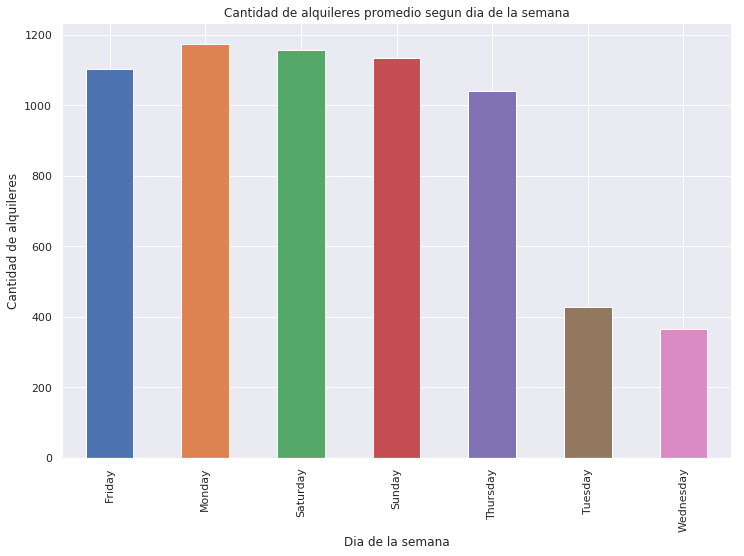

week_day
Monday       115873
Tuesday      122259
Wednesday    120201
Thursday     119089
Friday       109361
Saturday      44785
Sunday        38391
dtype: int64


In [29]:
(viajes.groupby("week_day").size()/cantDias).plot(kind='bar',figsize=(12,8))
plt.title("Cantidad de alquileres promedio segun dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Cantidad de alquileres")
plt.show()

print(viajes.groupby("week_day").size())

In [30]:
viajes["finde"] = viajes.start_date.dt.dayofweek >= 5


In [31]:
viajes

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,week_day,finde
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,Thursday,False
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,Thursday,False
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,Thursday,False
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,Thursday,False
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,Thursday,False
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109,Thursday,False
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,Thursday,False
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112,Thursday,False
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,Thursday,False
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,Thursday,False


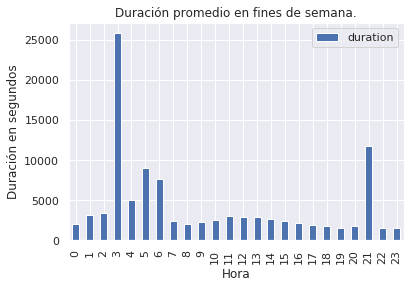

In [34]:
viajes["hour"] = viajes.start_date.dt.hour
# viajes.finde = los verdaderos fines de semana
viajes.loc[viajes.finde,['duration', 'hour']].groupby('hour').mean().plot.bar();
plt.title(u"Duración promedio en fines de semana.")
plt.xlabel("Hora")
plt.ylabel(u"Duración en segundos")
plt.show()

In [36]:
viajes.loc[viajes.finde,['duration', 'hour']]
print viajes.finde

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
669929    False
669930    False
669931    False
669932    False
669933    False
669934    False
669935    False
669936    False
669937    False
669938    False
669939    False
669940    False
669941    False
669942    False
669943    False
669944    False
669945    False
669946    False
669947    False
669948    False
669949    False
669950    False
669951    False
669952    False
669953    False
669954    False
669955    False
669956    False
669957    False
669958    False
Name: finde, Length: 669

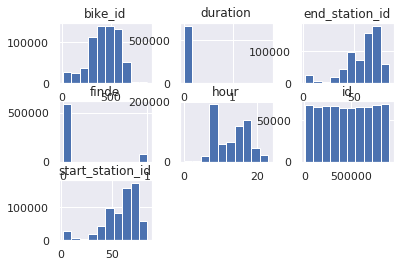

In [37]:
viajes.hist()
plt.show()